In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



```
# Loading the Fashion MNIST Dataset
加载 Fashion MNIST 数据集
This code snippet is responsible for loading and preparing the Fashion MNIST dataset for use in training and evaluating a neural network.
此代码片段负责加载和准备 Fashion MNIST 数据集，以便在训练和评估神经网络时使用。

fashion_mnist = keras.datasets.fashion_mnist  # load dataset
keras.datasets.fashion_mnist: This part accesses the Fashion MNIST dataset directly from Keras, a library that makes it easy to work with neural networks. Think of it like a built-in collection of images specifically for clothing items.
此部分直接从 Keras 库中访问 Fashion MNIST 数据集，Keras 是一个使处理神经网络变得容易的库。将其想象为专门用于服装物品的内置图像集合。
fashion_mnist: The dataset is loaded and assigned to the variable fashion_mnist. Now, fashion_mnist holds all the images and labels.
fashion_mnist : 数据集已加载并分配给变量 fashion_mnist 。现在， fashion_mnist 包含所有图像和标签。
Splitting into Training and Testing Sets
划分为训练集和测试集
* (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training
请谨慎使用代码
fashion_mnist.load_data(): This line calls a function to split the fashion_mnist dataset into two distinct parts: training and testing data. This is a crucial step in machine learning to make sure our model isn't just memorizing the data it sees during training.
这一行调用了一个函数，将 fashion_mnist 数据集分为两个不同的部分：训练数据和测试数据。这是机器学习中的一个关键步骤，以确保我们的模型不仅仅是在记忆训练过程中看到的数据。
(train_images, train_labels): This part receives the images (train_images) intended for training the neural network and their corresponding labels (train_labels). Labels tell us what each image represents (e.g., a shirt, a shoe, etc.).
这一部分接收用于训练神经网络的图像（ train_images ）及其对应的标签（ train_labels ）。标签告诉我们每张图像代表什么（例如，衬衫、鞋子等）。
(test_images, test_labels): Similarly, this receives the images (test_images) and labels (test_labels) held out for evaluating how well the trained neural network performs on unseen data.
同样，这接收用于评估训练好的神经网络在未见数据上的表现如何的图像（ test_images ）和标签（ test_labels ）。
In simpler terms:  简单来说：

Imagine you have a deck of flashcards to learn about animals. You would divide those flashcards into two piles: one for studying (training) and another for checking if you've learned well (testing). This code does the same thing with images of clothing, dividing them into a "training set" to teach the model and a "testing set" to see how well it learned.
想象你有一副关于动物的闪卡来学习。你会把这些闪卡分成两堆：一堆用于学习（训练），另一堆用于检查你是否学得好（测试）。这段代码对服装图片做的是同样的事情，将它们分成“训练集”来教模型和“测试集”来查看模型学得如何。
```



In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0

In [4]:
# 构建模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
#在这个层上使用 softmax 激活函数来计算每个类别的概率分布。这意味着该层中任何神经元的值将在 0 到 1 之间，其中 1 代表图像属于该类别的概率很高。#
])
#编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7795 - loss: 0.6313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8607 - loss: 0.3840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8742 - loss: 0.3448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8805 - loss: 0.3230
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8918 - loss: 0.3004
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8958 - loss: 0.2819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9022 - loss: 0.2647
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9027 - loss: 0.2574
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9093 - loss: 0.2415
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9090 - loss: 0.2406


In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3709
Test accuracy: 0.8759999871253967


In [9]:
# 进行预测
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([8.2696063e-09, 1.1451013e-11, 1.5079544e-11, 7.6824694e-15,
       1.7248494e-08, 3.0060762e-03, 5.0091344e-09, 2.4956999e-02,
       8.8405011e-10, 9.7203678e-01], dtype=float32)

###分割，test

###将其绘制成图表，看看模型对于全部 10 个类的预测。

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array) #返回预测数组中最大值的索引
  if predicted_label == true_label:   #如果预测的类别与正确类型一致
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")  # 将概率生成相应的柱状图
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  #
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###对比第一幅图形

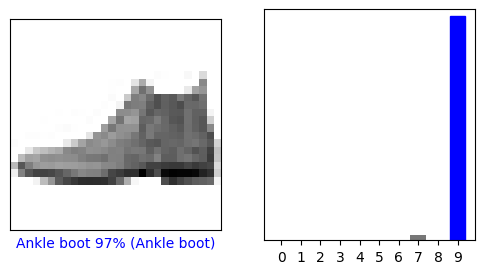

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()  # 预测与实际一致，颜色进行了覆盖

###对比第12幅图形

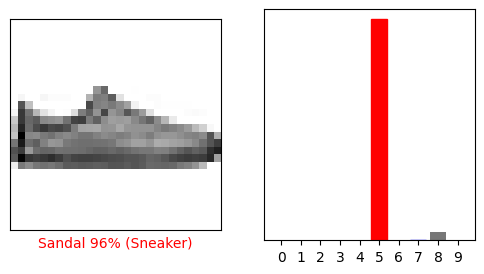

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()  # 实际的标签与预测谁的标签不一致，并且预测的实际概率非常小

###我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

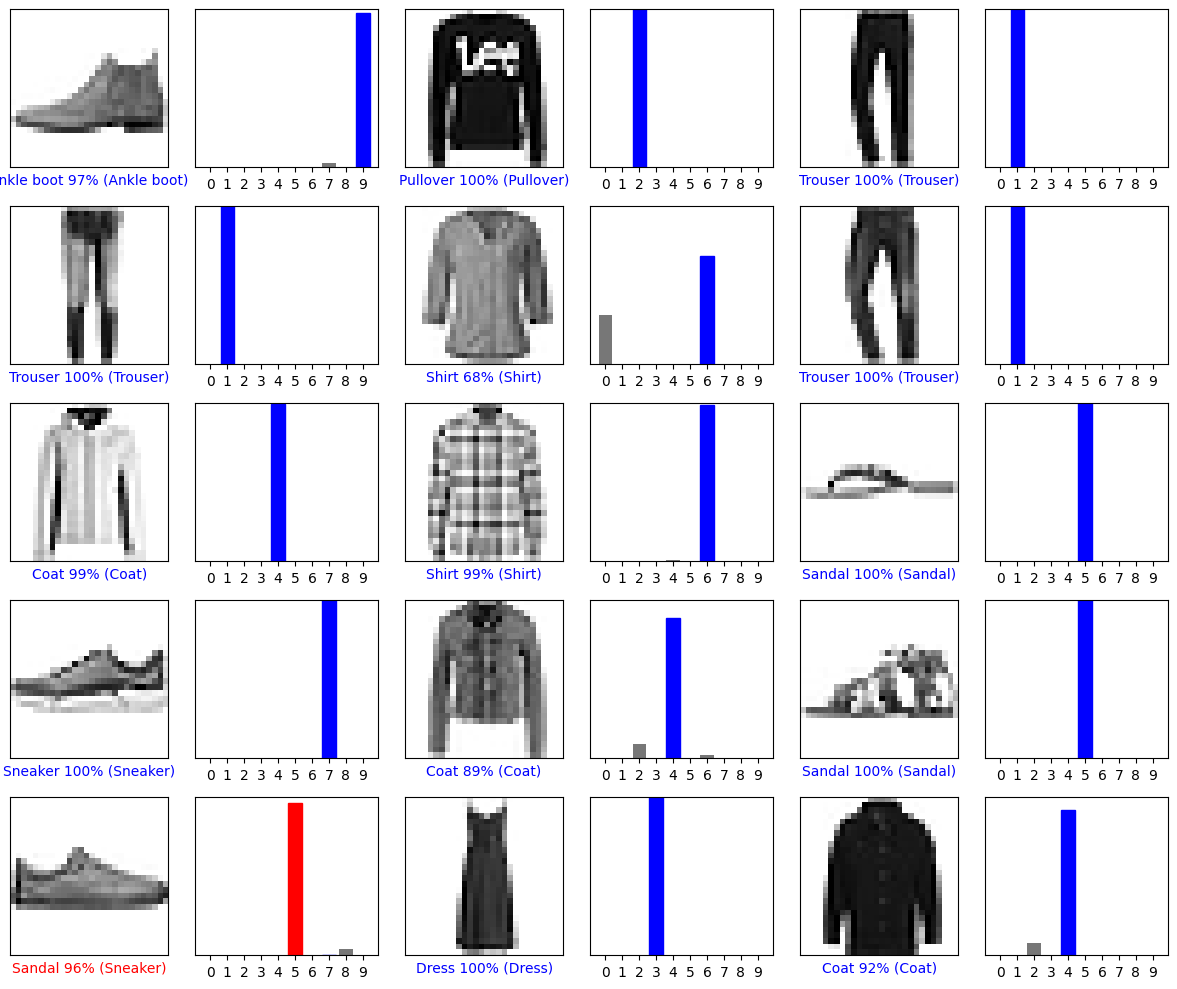

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)  # 每一幅图都有两种图形来表示，需要各一个图进行输出，所有每行有2*3的图形
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

###补充

####使用训练好的模型对**单个图像进行预测。**

In [20]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


####tf.keras 模型经过了优化，可同时对一个批或一组样本进行预测。**因此，即便您只使用一个图像，您也需要将其添加到列表中：**

In [21]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape) # 扩展维度

(1, 28, 28)


####现在预测这个图像的正确标签：

In [22]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[5.3319432e-05 2.1850765e-14 9.9967182e-01 3.1232866e-14 1.9253453e-04
  9.2587583e-16 8.2330560e-05 2.6241241e-17 1.6702976e-12 3.4192374e-19]]


####predictions_single[0]，就是取第一个数据，又因为单个图形，就只有一个数据，
shape为（1,10），用索引0，来数据

In [24]:
print(predictions_single.shape) # 二维

(1, 10)


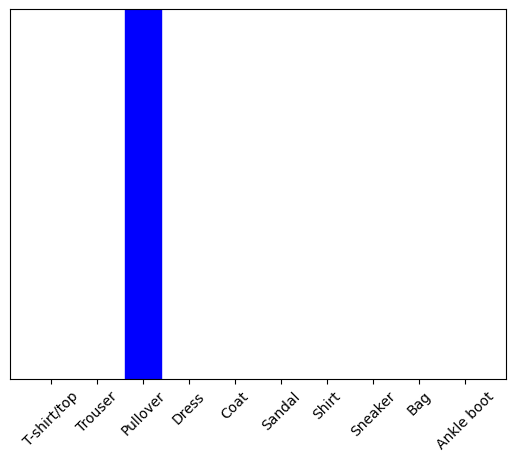

In [23]:
plot_value_array(1, predictions_single[0], test_labels)  #取第一行的数据
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

####keras.Model.predict 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [25]:
np.argmax(predictions_single[0])

np.int64(2)

#扩展部分

In [26]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [51]:
#from ipywidgets import interact, IntSlider, Text  # 用于交互式输入
from ipywidgets import interact, IntSlider, Text, Button, HBox, VBox, Output  # 用于交互式输入
from IPython.display import display

# 全局设置
COLOR = 'black'  # 默认改为黑色（适合白色背景）
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

# 类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [52]:
def predict(model, image, correct_label):
    """预测单张图片并显示结果（含错误处理）"""
    try:
        # 添加批次维度并检查形状
        if image.ndim == 2:
            image = np.expand_dims(image, axis=0)  #处理维度
        elif image.ndim != 3:
            raise ValueError("输入图片必须是 (28,28) 或 (batch,28,28)")

        prediction = model.predict(image)
        predicted_class = class_names[np.argmax(prediction[0])]
        show_image(image[0], class_names[correct_label], predicted_class)
    except Exception as e:
        print(f"预测失败: {e}")

In [30]:
def predict_batch_1(model, images, labels):
    """批量预测并显示多张图片结果"""
    try:
        predictions = model.predict(images)
        for i in range(len(images)):
            predicted_class = class_names[np.argmax(predictions[i])]
            show_image(images[i], class_names[labels[i]], predicted_class)
    except Exception as e:
        print(f"批量预测失败: {e}")

###predict-batch函数改进，每行输出多张图片

In [39]:
def predict_batch_2(model, images, labels, cols=3, figsize=(15, 10)):
    """
    批量预测并显示多张图片（网格布局）

    参数:
        model: 训练好的模型
        images: 输入的图片数组 (形状为 [batch, 28, 28])
        labels: 对应的真实标签
        cols: 每行显示的图片列数 (默认3)
        figsize: 画布大小 (默认 (15, 10))
    """
    try:
        predictions = model.predict(images)
        num_images = len(images)
        rows = (num_images + cols - 1) // cols  # 计算需要的行数

        # 创建子图网格
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        if rows == 1:
            axes = axes.reshape(1, -1)  # 处理单行的情况
        plt.subplots_adjust(wspace=0.5, hspace=0.5)  # 调整子图间距

        for i in range(num_images):
            row = i // cols
            col = i % cols
            ax = axes[row, col]

            # 显示图片
            ax.imshow(images[i], cmap=plt.cm.binary)
            ax.set_title(f"True: {class_names[labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}")
            ax.axis('off')  # 关闭坐标轴

        # 隐藏多余的子图
        for i in range(num_images, rows * cols):
            row = i // cols
            col = i % cols
            axes[row, col].axis('off')

        plt.show()

    except Exception as e:
        print(f"批量预测失败: {e}")

##多行数据优化进行分页

In [53]:
def predict_batch(model, images, labels, page_size=9, cols=3):
    """
    分页显示批量预测结果

    参数:
        model: 训练好的模型
        images: 输入的图片数组 (形状为 [batch, 28, 28])
        labels: 对应的真实标签
        page_size: 每页显示的图片数 (默认9)
        cols: 每行显示的列数 (默认3)
    """
    num_images = len(images)
    num_pages = (num_images + page_size - 1) // page_size  # 计算总页数
    current_page = 0  # 当前页码

    # 创建输出区域和按钮
    output = Output()
    prev_button = Button(description="上一页")
    next_button = Button(description="下一页")
    page_label = Button(description=f"第1页 / 共{num_pages}页", disabled=True)
    buttons = HBox([prev_button, page_label, next_button])

    def display_page(page):
        """显示指定页码的图片"""
        with output:
            output.clear_output(wait=True)
            start = page * page_size
            end = min((page + 1) * page_size, num_images)
            page_images = images[start:end]
            page_labels = labels[start:end]

            # 预测当前页的图片
            predictions = model.predict(page_images)

            # 计算网格布局
            rows = (len(page_images) + cols - 1) // cols
            fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
            if rows == 1:
                axes = axes.reshape(1, -1)
            plt.subplots_adjust(wspace=0.3, hspace=0.5)

            for i in range(len(page_images)):
                row, col = i // cols, i % cols
                ax = axes[row, col]
                ax.imshow(page_images[i], cmap=plt.cm.binary)
                ax.set_title(
                    f"True: {class_names[page_labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}",
                    fontsize=10
                )
                ax.axis('off')

            # 隐藏多余子图
            for i in range(len(page_images), rows * cols):
                axes[i // cols, i % cols].axis('off')

            plt.show()

    def on_prev_click(b):
        """上一页按钮回调"""
        nonlocal current_page
        if current_page > 0:
            current_page -= 1
            page_label.description = f"第{current_page + 1}页 / 共{num_pages}页"
            display_page(current_page)

    def on_next_click(b):
        """下一页按钮回调"""
        nonlocal current_page
        if current_page < num_pages - 1:
            current_page += 1
            page_label.description = f"第{current_page + 1}页 / 共{num_pages}页"
            display_page(current_page)

    # 绑定按钮事件
    prev_button.on_click(on_prev_click)
    next_button.on_click(on_next_click)

    # 初始显示第一页
    display(VBox([buttons, output]))
    display_page(0)

In [54]:
def show_image(img, label, guess):
    """显示单张图片及预测结果"""
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"真实标签: {label}")
    plt.xlabel(f"模型预测: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [55]:
def get_number():
    """命令行输入单张图片编号（旧版保留兼容）"""
    while True:
        num = input("输入图片编号 (0-999) 或范围 (如 5-10): ")
        if '-' in num:
            try:
                start, end = map(int, num.split('-')) #对字符串进行分割，提取start, end
                if 0 <= start <= end < 1000:
                    return list(range(start, end + 1)) #转为列表
            except:
                pass
        elif num.isdigit():
            num = int(num)
            if 0 <= num <= 999:
                return [num]
        print("输入无效，请重试...")

In [56]:
def interactive_predict(model, test_images, test_labels):
    """GUI交互式预测界面"""
    def _predict(num: int):
        image = test_images[num]
        label = test_labels[num]
        predict(model, image, label) #调用第一个单张函数

    # 创建滑动条输入
    interact(
        _predict,
        num=IntSlider(min=0, max=len(test_images)-1, step=1, value=0)
    )

In [57]:
# 主程序
def main():
    # 加载模型和数据（示例）
    '''  模型已经加载
   model = keras.models.load_model('fashion_mnist_model.h5')
    (_, _), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
    test_images = test_images / 255.0  # 归一化
   '''
    # 选择模式
    mode = input("选择模式: [1]命令行单张 [2]命令行批量 [3]GUI交互 (默认1): ").strip()

    if mode == '2':
        # 命令行批量模式
        nums = get_number()
        predict_batch(model, test_images[nums], test_labels[nums])
    elif mode == '3':
        # GUI交互模式
        print("使用滑动条选择图片编号↓")
        interactive_predict(model, test_images, test_labels)
    else:
        # 默认命令行单张模式
        num = get_number()[0]
        predict(model, test_images[num], test_labels[num])

if __name__ == "__main__":
    main()

选择模式: [1]命令行单张 [2]命令行批量 [3]GUI交互 (默认1): 2
输入图片编号 (0-999) 或范围 (如 5-10): 10-19


####1. 增加跳转页码输入框(多行输出)

In [ ]:
from ipywidgets import IntText

page_input = IntText(value=1, description="跳转到:")
def on_page_change(change):
    if 1 <= change['new'] <= num_pages:
        current_page = change['new'] - 1
        display_page(current_page)
page_input.observe(on_page_change, names='value')

# 将 page_input 添加到 buttons 中
buttons = HBox([prev_button, page_label, next_button, page_input])

###2. 保存当前页为图片

In [ ]:
save_button = Button(description="保存本页")
def on_save_click(b):
    plt.savefig(f"page_{current_page + 1}.png")
save_button.on_click(on_save_click)

###test-参考

In [ ]:
# 假设 test_images 和 test_labels 是测试数据
selected_indices = [5, 10, 15, 20, 25, 30]  # 选择6张图片
predict_batch(model, test_images[selected_indices], test_labels[selected_indices], cols=3)

# 每行4列，画布大小调整为 20x10
predict_batch(model, test_images[:8], test_labels[:8], cols=4, figsize=(20, 10))

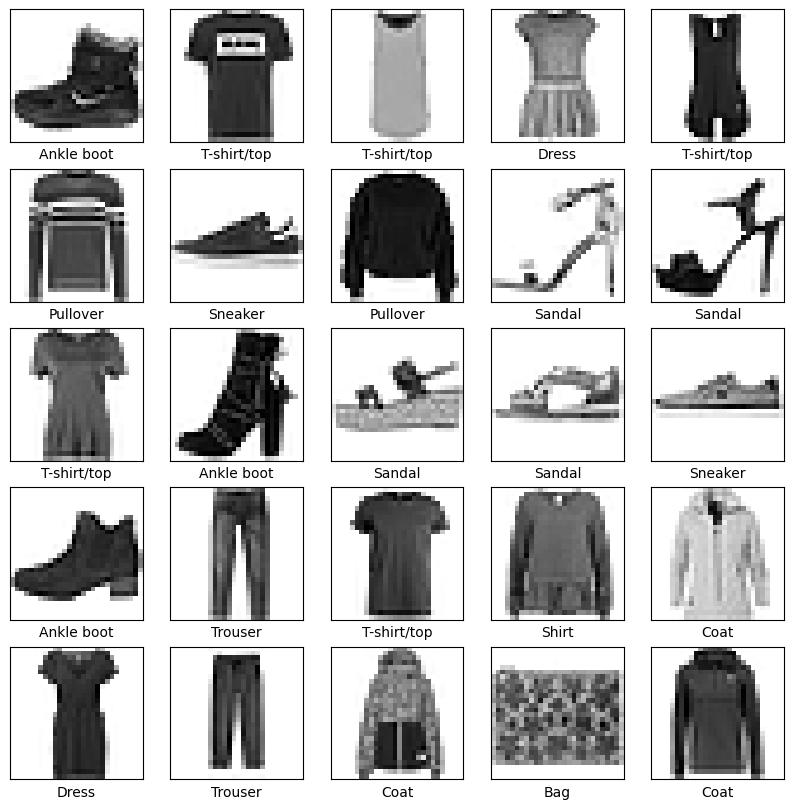

In [7]:
plt.figure(figsize=(10,10)) #创建了一个新的图形（绘制我们的图表的空间），大小为 10x10 英寸
for i in range(25):
    plt.subplot(5,5,i+1) #subplot(5,5,i+1) 创建一个5x5的子图网格，i+1确定当前图像要使用的特定子图。
    plt.xticks([]) #plt.xticks([]) 和 plt.yticks([]) :
    #  这两行代码移除了子图的 x 轴和 y 轴的刻度（数值标记），使图像显示更清晰
    plt.yticks([])
    plt.grid(False) #plt.grid(False) ：此行关闭子图中的网格线，进一步增强了视觉清晰度。
    plt.imshow(train_images[i], cmap=plt.cm.binary) #imshow 显示 train_images 数据集中的第 i 张图像。 cmap=plt.cm.binary 指定图像应以灰度显示。
    plt.xlabel(class_names[train_labels[i]])
plt.show()